## First step
import useful packages and explore the dataset

In [25]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

df = pd.read_csv("datasets/StudentPerformanceFactors.csv")

In [26]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [28]:
nan_cols = df.columns[df.isnull().any()]
nan_cols

Index(['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'], dtype='object')

In [29]:
nan_summary = df.isnull().sum()
nan_summary = nan_summary[nan_summary > 0]
print(nan_summary)

Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64


In [30]:
df[nan_cols].head()

,Teacher_Quality,Parental_Education_Level,Distance_from_Home
0,Medium,High School,Near
1,Medium,College,Moderate
2,Medium,Postgraduate,Near
3,Medium,High School,Moderate
4,High,College,Near


In [31]:
# replace NAN values with mode
df[nan_cols] = df[nan_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [32]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

as you can see, we have got rid of the NAN values now.

## Step 2
Data preprocessing

Now convert the categorical data into numerical data. This will help us create ML models more easily

In [33]:
# Isolate non-numeric features
non_numeric = df.select_dtypes(exclude=["number"]).columns
for column in non_numeric:
    print(column)
    print(df[column].unique())

Parental_Involvement
['Low' 'Medium' 'High']
Access_to_Resources
['High' 'Medium' 'Low']
Extracurricular_Activities
['No' 'Yes']
Motivation_Level
['Low' 'Medium' 'High']
Internet_Access
['Yes' 'No']
Family_Income
['Low' 'Medium' 'High']
Teacher_Quality
['Medium' 'High' 'Low']
School_Type
['Public' 'Private']
Peer_Influence
['Positive' 'Negative' 'Neutral']
Learning_Disabilities
['No' 'Yes']
Parental_Education_Level
['High School' 'College' 'Postgraduate']
Distance_from_Home
['Near' 'Moderate' 'Far']
Gender
['Male' 'Female']


In [34]:
# Substitute non-numeric features with numeric substitutions
mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Parental_Involvement'] = df['Parental_Involvement'].map(mapping)
df['Access_to_Resources'] = df['Access_to_Resources'].map(mapping)
df['Motivation_Level'] = df['Motivation_Level'].map(mapping)
df['Family_Income'] = df['Family_Income'].map(mapping)
df['Teacher_Quality'] = df['Teacher_Quality'].map(mapping)

mapping = {'Negative': 1, 'Neutral': 2, 'Positive': 3}
df['Peer_Influence'] = df['Peer_Influence'].map(mapping)

mapping = {'Yes': 1, 'No': 0}
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map(mapping)
df['Internet_Access'] = df['Internet_Access'].map(mapping)
df['Learning_Disabilities'] = df['Learning_Disabilities'].map(mapping)

mapping = {'Near': 1, 'Moderate': 2, 'Far': 3}
df['Distance_from_Home'] = df['Distance_from_Home'].map(mapping)

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,73,1,1,0,1,2,Public,3,3,0,High School,1,Male,67
1,19,64,1,2,0,8,59,1,1,2,2,2,Public,1,4,0,College,2,Female,61
2,24,98,2,2,1,7,91,2,1,2,2,2,Public,2,4,0,Postgraduate,1,Male,74
3,29,89,1,2,1,8,98,2,1,1,2,2,Public,1,4,0,High School,2,Male,71
4,19,92,2,2,1,6,65,2,1,3,2,3,Public,2,4,0,College,1,Female,70


## Step 3
visualisation

In [35]:
import seaborn as sns

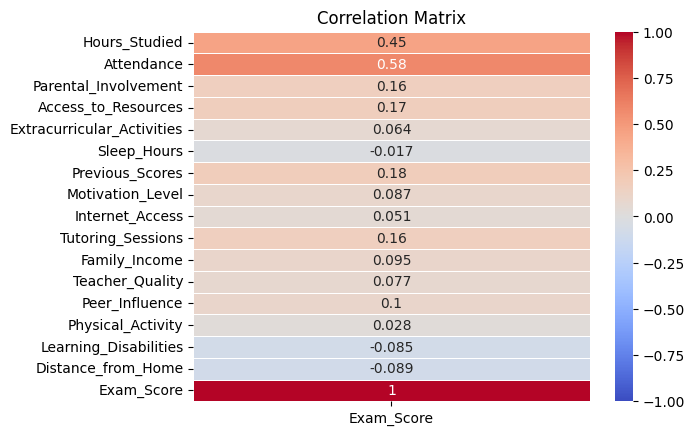

In [36]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()[['Exam_Score']]
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

Based on this correlation matrix we could clearly see that hours studied and attandance have the most impact on the exam score

Now let's visualize the impact of hours studied and attendace on the exam results

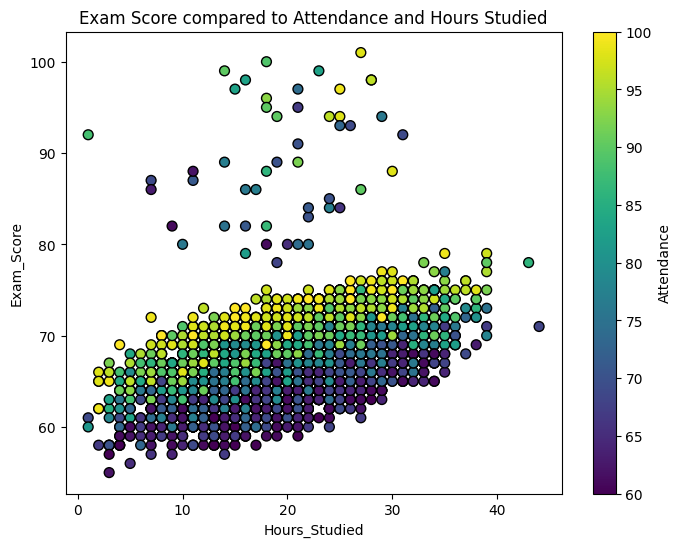

In [37]:
plt.figure(figsize=(8, 6))
x = 'Hours_Studied'
z = 'Attendance'
y = 'Exam_Score'
scatter = plt.scatter(df[x], df[y], c=df[z], cmap='viridis', s=50, edgecolors='k')

# Add color bar to show the scale of the third variable
plt.colorbar(scatter, label=z)

# Labels and title
plt.xlabel(x)
plt.ylabel(y)
plt.title('Exam Score compared to Attendance and Hours Studied')

# Show the plot
plt.show()

you can see that studied hours and attendance do have an impact on the exam scores. But you can also see that there are some exceptions/ outliers. You could also see that attedance has a bigger impact the studied hours. For example students who studied 20 hours and have a higher attendace percentage, do have better exam scores. 

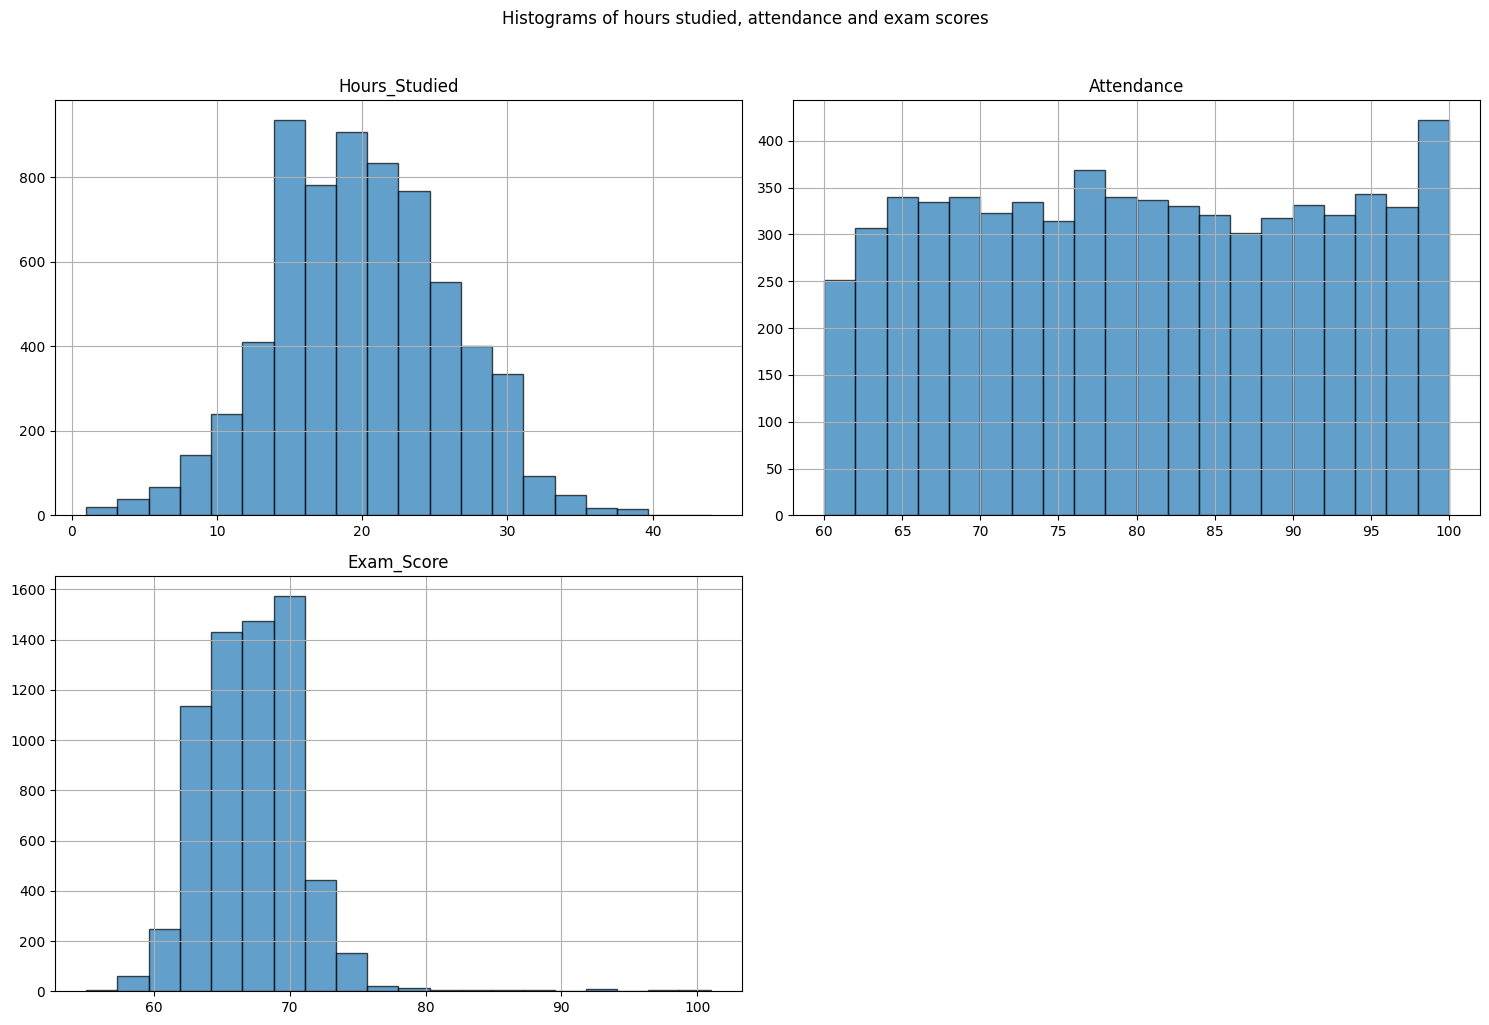

In [39]:
# create histogram
df[["Hours_Studied", "Attendance", "Exam_Score"]].hist(figsize=(15, 10), bins=20, edgecolor='black', alpha=0.7)

plt.suptitle('Histograms of hours studied, attendance and exam scores', y=1.02)
plt.tight_layout()
plt.show()

The histogram of **Hours_Studied** shows the following conclusions:

1. **Normal Distribution**: The data appears to follow a roughly normal distribution, with most students studying around **20 hours** per period. The distribution is symmetric, peaking in the middle and tapering off toward the lower and higher ends.

2. **Study Time Range**: The majority of students study between **10 and 30 hours**, with very few studying less than 10 or more than 30 hours. This suggests that the majority of students maintain a moderate and consistent study routine.

This insight indicates that study habits are generally centered around a specific range, and outliers (e.g., students studying significantly less or more) could be examined further to understand their impact on performance.

The histogram of **Attendance** reveals the following conclusions:

1. **Broad Distribution**: The attendance values are fairly evenly distributed across the range from 60% to 100%, with no significant skewness. This suggests that students have diverse levels of attendance.

2. **Peak at 100%**: There is a noticeable peak at 100% attendance, indicating that a significant number of students maintain perfect attendance. This group may represent highly motivated students or those who place a strong emphasis on attending all classes.

The histogram of **Exam_Score** reveals the following conclusions:

1. **Skewed Distribution**: The exam scores are concentrated between **60 and 75**, indicating that most students fall within this range. The distribution is slightly left-skewed, with a small number of students scoring above 80.

2. **Limited High Performers**: Only a small number of students achieve scores higher than **80**, suggesting that exceptional performance is less common.

## Step 4
keep only the relevant columns and prepare for ML models

In [46]:
from sklearn.model_selection import train_test_split

# Keep only the specified columns
columns_to_keep = ['Hours_Studied', 'Attendance', 'Exam_Score']
df_filtered = df[columns_to_keep]

df_filtered.head()

,Hours_Studied,Attendance,Exam_Score
0,23,84,67
1,19,64,61
2,24,98,74
3,29,89,71
4,19,92,70


In [47]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Hours_Studied  6607 non-null   int64
 1   Attendance     6607 non-null   int64
 2   Exam_Score     6607 non-null   int64
dtypes: int64(3)
memory usage: 155.0 KB


## Step 5
Choose and train the models

### Decision tree

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# Define features (X) and target (y)
X = df[['Hours_Studied', 'Attendance']]
y = df['Exam_Score']

# Split data into train, validation, and test sets (80%-10%-10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Make predictions on training, validation, and test sets
y_train_pred = dt_model.predict(X_train)
y_val_pred = dt_model.predict(X_val)
y_test_pred = dt_model.predict(X_test)

# Function to calculate accuracy (percentage of predictions within tolerance)
def calculate_accuracy(y_true, y_pred, tolerance=5):
    within_tolerance = np.abs(y_true - y_pred) <= tolerance
    return np.mean(within_tolerance) * 100  # Convert to percentage

# Calculate accuracy for training, validation, and test sets
train_accuracy = calculate_accuracy(y_train, y_train_pred)
val_accuracy = calculate_accuracy(y_val, y_val_pred)
test_accuracy = calculate_accuracy(y_test, y_test_pred)

# Evaluate the model on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
print("Training Set Performance:")
print(f"  MSE: {train_mse:.2f}")
print(f"  MAE: {train_mae:.2f}")
print(f"  Accuracy (within ±5): {train_accuracy:.2f}%")

# Evaluate the model on the validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
print("\nValidation Set Performance:")
print(f"  MSE: {val_mse:.2f}")
print(f"  MAE: {val_mae:.2f}")
print(f"  Accuracy (within ±5): {val_accuracy:.2f}%")

# Evaluate the model on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("\nTest Set Performance:")
print(f"  MSE: {test_mse:.2f}")
print(f"  MAE: {test_mae:.2f}")
print(f"  Accuracy (within ±5): {test_accuracy:.2f}%")

Training Set Performance:
  MSE: 7.18
  MAE: 1.62
  Accuracy (within ±5): 98.49%

Validation Set Performance:
  MSE: 5.48
  MAE: 1.55
  Accuracy (within ±5): 99.24%

Test Set Performance:
  MSE: 7.15
  MAE: 1.63
  Accuracy (within ±5): 98.49%


In [60]:
def predict_student_score(hours_studied, attendance, model):
    """
    Predicts the exam score for a student based on hours studied and attendance.

    Parameters:
    - hours_studied (int or float): Number of hours the student studied.
    - attendance (int or float): Attendance percentage of the student (0-100).
    - model: Trained regression model (e.g., DecisionTreeRegressor, RandomForestRegressor).

    Returns:
    - float: Predicted exam score.
    """
    # Prepare the input as a 2D array
    student_input = [[hours_studied, attendance]]
    
    # Predict the score using the trained model
    predicted_score = model.predict(student_input)
    
    return predicted_score[0]

# Example usage
predicted_score = predict_student_score(30, 0, dt_model)  # Replace dt_model with your model if different
print(f"Predicted Exam Score: {predicted_score:.2f}")

Predicted Exam Score: 67.77


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [66]:
df_filtered.head()

,Hours_Studied,Attendance,Exam_Score
0,23,84,67
1,19,64,61
2,24,98,74
3,29,89,71
4,19,92,70


In [67]:
print(predict_student_score(23, 84, dt_model))

69.43979057591623


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [62]:
import numpy as np

def visualize_decision_path(hours_studied, attendance, model, feature_names):
    """
    Visualizes the decision path for a given input in a trained Decision Tree model.

    Parameters:
    - hours_studied (int or float): Number of hours the student studied.
    - attendance (int or float): Attendance percentage of the student (0-100).
    - model: Trained Decision Tree Regressor.
    - feature_names (list of str): Names of the input features.
    """
    # Prepare the input as a 2D array
    student_input = [[hours_studied, attendance]]
    
    # Get the decision path
    decision_path = model.decision_path(student_input)
    
    # Extract decision nodes
    node_indicator = decision_path.indices
    node_values = model.tree_.value  # Predicted values at each node
    thresholds = model.tree_.threshold  # Split thresholds
    
    print(f"Decision Path for input [{hours_studied}, {attendance}]:\n")
    for node in node_indicator:
        # If it's a leaf node
        if thresholds[node] == -2:  # A threshold of -2 indicates a leaf node
            print(f"Reached leaf node {node}:")
            print(f"  Predicted value: {node_values[node][0][0]:.2f}")
        else:
            # For decision nodes, get the feature and threshold
            feature_index = model.tree_.feature[node]
            threshold = thresholds[node]
            feature_name = feature_names[feature_index]
            
            print(f"Node {node}:")
            print(f"  Split: {feature_name} <= {threshold:.2f}")
            print(f"  Predicted value at this node: {node_values[node][0][0]:.2f}")

# Example usage
visualize_decision_path(30, 0, dt_model, feature_names=['Hours_Studied', 'Attendance'])


Decision Path for input [30, 0]:

Node 0:
  Split: Attendance <= 82.50
  Predicted value at this node: 67.22
Node 1:
  Split: Hours_Studied <= 20.50
  Predicted value at this node: 65.54
Node 17:
  Split: Attendance <= 72.50
  Predicted value at this node: 67.03
Node 18:
  Split: Hours_Studied <= 29.50
  Predicted value at this node: 66.04
Node 22:
  Split: Attendance <= 68.50
  Predicted value at this node: 68.30
Reached leaf node 23:
  Predicted value: 67.77


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


### Linear regression

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df[['Hours_Studied', 'Attendance']]
y = df['Exam_Score']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluate the model
y_test_pred = lr_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Linear Regression Test MSE: {test_mse:.2f}")
print(f"Linear Regression Test R² Score: {test_r2:.2f}")

Linear Regression Test MSE: 5.81
Linear Regression Test R² Score: 0.59


In [70]:
df_filtered.head()

,Hours_Studied,Attendance,Exam_Score
0,23,84,67
1,19,64,61
2,24,98,74
3,29,89,71
4,19,92,70


In [69]:
def predict_student_score_linear(hours_studied, attendance, model):
    """
    Predicts the exam score for a student using a Linear Regression model.

    Parameters:
    - hours_studied (int or float): Number of hours the student studied.
    - attendance (int or float): Attendance percentage of the student (0-100).
    - model: Trained Linear Regression model.

    Returns:
    - float: Predicted exam score.
    """
    # Prepare the input as a 2D array
    student_input = [[hours_studied, attendance]]
    
    # Predict the score using the trained model
    predicted_score = model.predict(student_input)
    
    return predicted_score[0]

# Example usage
predicted_score = predict_student_score_linear(23, 84, lr_model)
print(f"Predicted Exam Score: {predicted_score:.2f}")

Predicted Exam Score: 68.91


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Conclusion

These models were chosen with the main focus on the accuracy of the preditions. Like this teachers can help students from who they know they don't study a lot and/or attend classes often to put extra effort to get better grades. Only the outlier student could get higher grades with lower studying and/or attendance. But the reasons for that can't be explained with the data we have in this dataset.